Universidad del valle de Guatemala  
Dpto. Ciencias de la computacion  
Inteligencia Artificial  
Alberto Suriano  

Laboratorio 1  
Andres Quinto - 18288  

El link de mi repositorio es el siguiente: https://github.com/AndresQuinto5/IA_LAB1.git

# Task 1 - Regresión Lineal

1. Considera un modelo de regresión lineal con dos características, X₁ y X₂, y sus pesos correspondientes w₁ y w₂. Si el modelo predice una salida y mediante la ecuación y = 2w₁X₁ + 3w₂X₂ + 1 ¿cuál es la interpretación del coeficiente 3w₂ en el contexto del modelo?  

    Respuesta:  

    Hay distintos puntos de suma importancia en relacion al coeficiente 3w₂ los cuales voy a listar a continuación:

    - Magnitud: El valor numerico de de 3w₂ nos indica cuanto cambia la salida Y con un cambio en X₂.
    - Dirección: Si 3w₂ es positivo significa que a medida que X₂ aumenta, Y (Variable independiente) tambien aumenta. Si el coeficiente fuera negativo, llevaria un aumento en X pero disminucion en Y.
    - Importancia Relativa: Debido a que es un coeficiente 3, significa que va a multiplicar los cambios en X por 3, lo que conlleva a que tenga cambios mas significativos a medida que crece.  


# Task 1 - Regresión Lineal

2. Explica el concepto de multicolinealidad en el contexto de la regresión lineal. ¿Cómo afecta la multicolinealidad a la interpretación de los coeficientes de regresión individuales?  

    Primero debemos entender que es la multicolinealidad, se refiere a la situación en la que dos o más variables predictoras (características) en el modelo están altamente correlacionadas entre sí.  Esto significa que una variable predictora puede ser linealmente pronosticada desde las otras con un grado sustancial de precisión.  

    Ahora, esto tambien no siempre es bueno y tiene sus demas caracteristicas como por ejemplo:  

    - Estimación de Coeficientes: La multicolinealidad hace que la estimación de los coeficientes de regresión sea menos precisa.  
    - Inflación de la Varianza: Una consecuencia directa de la multicolinealidad es la inflación de la varianza de los coeficientes de regresión. Esto significa que los intervalos de confianza para los coeficientes se vuelven más amplios, lo que reduce la confiabilidad de las estimaciones de los coeficientes.  
    - Dificultades en la Interpretación: Debido a la alta correlación entre las variables, se vuelve difícil aislar el efecto de una variable independiente sobre la variable dependiente, ya que los cambios en una variable predictora están asociados con cambios en otra(s).  

    Sin embargo, esto puede verse como algo completamente malo, pero como identificamos algo asi? como podemos tratar la multicolinealidad?:

    - Factor de Inflación de la Varianza (VIF): Es una medida común para diagnosticar la multicolinealidad. Un VIF alto para una variable predictora indica una fuerte multicolinealidad.
    - Correlación entre Variables: Un análisis de correlación puede ayudar a identificar pares de variables altamente correlacionadas.

    A continuacion muestro una imagen de un modelo con una regresion con sus variables ya trabajadas y valores de VIF aceptables (2023, Frost):

    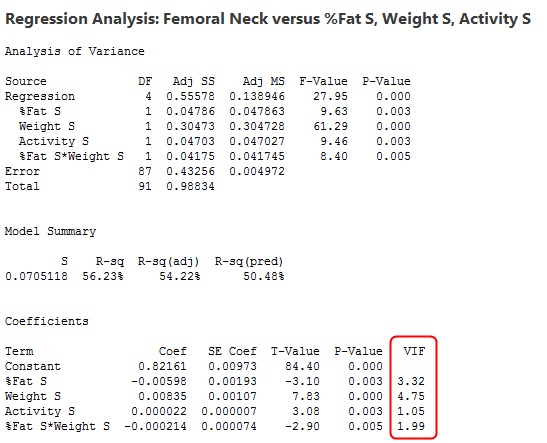

    Herramientas:
    - Eliminación de Variables: Una solución puede ser eliminar una de las variables predictoras correlacionadas.
    - Combinación de Variables: Combinar variables correlacionadas en una nueva variable representativa también puede ser útil.
    - Regularización: Métodos como la regresión Ridge o Lasso pueden ayudar a mitigar los efectos de la multicolinealidad penalizando los coeficientes de regresión.

    El material bibliografico en cual me base es el siguiente:
    
    1. Frost, Jim. "Multicollinearity in Regression Analysis: Problems, Detection, and Solutions." Statistics By Jim, 2023. Disponible en: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/.

    2. Penn State, Eberly College of Science. "Lesson 12: Multicollinearity & Other Regression Pitfalls." Disponible en: https://online.stat.psu.edu/stat501/lesson/12.

In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
# Cargar el dataset
file_path = 'dataset_phishing.csv'  # Colocamos la ruta (en este caso esta en el mismo workspace)
dataset = pd.read_csv(file_path)

# Mostrar las primeras filas para inspeccionar los datos
dataset.head()


,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [47]:
# Verificar si hay valores nulos en el dataset
null_values = dataset.isnull().sum()
print (null_values)

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64


In [48]:
# Conteo de valores únicos para cada columna para identificar variables categóricas
unique_counts = dataset.nunique()

# Revisión de la distribución de la variable objetivo 'status'
class_distribution = dataset['status'].value_counts()

unique_counts, class_distribution


(url                11429
 length_url           324
 length_hostname       83
 ip                     2
 nb_dots               19
                    ...  
 web_traffic         4744
 dns_record             2
 google_index           2
 page_rank             11
 status                 2
 Length: 89, dtype: int64,
 status
 legitimate    5715
 phishing      5715
 Name: count, dtype: int64)

IMPORTANTE: En este apartado pude darme cuenta de las columnas del dataset, ademas de que las columna objetivo es la de status, que tiene dos items unicos e indica si la url es legitima o se considera phising.
Estas variables estan balanceadas ya que cuentan con la misma cantidad ambas.

1. Tamaño y Estructura:

- El dataset contiene 11,430 entradas.
- Hay 89 columnas, lo que indica una amplia variedad de características.

2. Tipos de Datos:

- La mayoría de las columnas son de tipo entero (int64) o flotante (float64).
- Hay una columna de texto (object), que es la URL.
- No hay valores nulos.

3. Características Incluidas:

- Incluye datos numéricos relacionados con la estructura de la URL, como la longitud de la URL, el número de puntos, guiones, etc.
- Características específicas del dominio, como la edad del dominio y el tráfico web.
- La columna status indica si una URL es legitimate o phishing, lo que sugiere que esta es nuestra variable objetivo para la clasificación.

4. Distribución de la Clase Objetivo:

- La variable objetivo status tiene una distribución equilibrada: 5,715 instancias de legitimate y 5,715 de phishing.
- Esto es favorable para el modelado, ya que no se requiere balanceo adicional

In [49]:
#Aqui elimino la primera columna, debido a que no es relevante para los modelos y causaria problemas al ser urls
dataset = dataset.iloc[:, 1:]
dataset.head()


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,37,19,0,3,0,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,77,23,1,1,0,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,126,50,1,4,1,0,1,2,0,3,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,18,11,0,2,0,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,55,15,0,2,2,0,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Realizo una matriz de correlacion para corroborar como se comportan mis feature en relacion a status

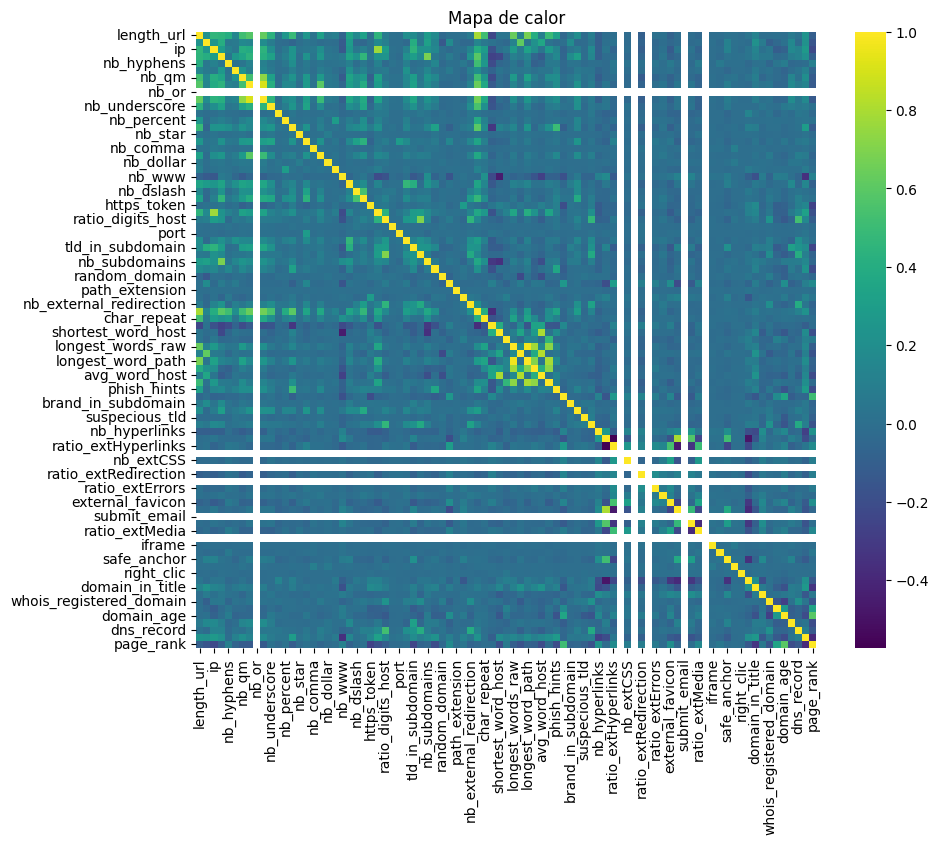

In [50]:
# Calcular la matriz de correlación
correlation_matrix = dataset.corr(numeric_only=True)

# Crear un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='viridis')
plt.title("Mapa de calor")
plt.show()


Realizo el encoding de la clase objetivo y ademas escalo las features que lo necesitan

In [51]:
# # Mapeo original de la variable 'status'
# status_map = {1: 'legitimate', -1: 'phishing'}
# Realizamos encoding para la variable objetivo status
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
le = LabelEncoder()

# Apply Label Encoding to the "status" variable
dataset["status"] = le.fit_transform(dataset["status"])

# Verify the changes
dataset["status"].head()
#corroboramos tambien el balanceo
dataset["status"].value_counts()

#Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Variables que sus dimensiones se salen de lo normal y deben ser escaladas
scaled = ['length_url', 'length_hostname', 'domain_registration_length', 'domain_age', 'web_traffic', 'page_rank']

# Apply the scaler to the features in the list
dataset[scaled] = scaler.fit_transform(dataset[scaled])

# Verify the changes

dataset[scaled].head()


,length_url,length_hostname,domain_registration_length,domain_age,web_traffic,page_rank
0,-0.436327,-0.193964,-0.549299,-1.307594,-0.429340,0.320974
1,0.287067,0.177207,-0.510022,0.548471,-0.429340,-0.467407
2,1.173224,2.682613,-0.587348,-0.018839,2.491612,-1.255788
3,-0.779940,-0.936306,-0.528433,-1.307594,-0.375359,-0.073217
4,-0.110800,-0.565135,-0.329595,1.323334,-0.424968,1.109355


Estas son las variables mas correlacionadas con status

In [52]:
# Calculate the correlation matrix
correlation_matrix = dataset.corr()

# Get the absolute correlation values with the "status" feature
correlation_with_status = correlation_matrix["status"].abs().sort_values(ascending=False)

# Print the most correlated values with the "status" feature
print(correlation_with_status)

status                  1.000000
google_index            0.731171
page_rank               0.511137
nb_www                  0.443468
ratio_digits_url        0.356395
                          ...   
ratio_nullHyperlinks         NaN
ratio_intRedirection         NaN
ratio_intErrors              NaN
submit_email                 NaN
sfh                          NaN
Name: status, Length: 88, dtype: float64


Ahora voy a proceder a hacer el split en el dataset y la preparacion para los modelos:

- Dividiremos el dataset en un 80% para entrenamiento y un 20% para pruebas. Esta es una división comúnmente utilizada que proporciona suficientes datos para el entrenamiento del modelo, manteniendo al mismo tiempo una cantidad adecuada para la evaluación.
- La división para un conjunto de validación es útil para afinar los hiperparámetros de los modelos sin tocar el conjunto de prueba. Una práctica común es tomar un 10% del conjunto de entrenamiento para validación. Sin embargo, dado que disponemos de suficientes datos y considerando que tanto la regresión logística como KNN no son tan propensos al sobreajuste, podríamos optar por no separar un conjunto de validación y, en cambio, usar la validación cruzada durante el entrenamiento.
- Dado que estamos tratando con un problema de clasificación binaria y el dataset está balanceado, la precisión (accuracy) puede ser una métrica adecuada. Sin embargo, en el contexto de la detección de phishing, es crítico minimizar los falsos negativos (sitios de phishing clasificados incorrectamente como legítimos). Por lo tanto, podríamos considerar la sensibilidad (recall) o el área bajo la curva ROC (AUC-ROC) como métricas más informativas, ya que proporcionan una mejor comprensión de cómo el modelo identifica correctamente todas las instancias positivas (phishing).

In [53]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target variable (y)
X = dataset.drop(columns=['status'])
y = dataset['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting datasets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

# # Check for string variables in the training set
# string_vars_train = X_train.select_dtypes(include='object').columns.tolist()
# if len(string_vars_train) > 0:
#     print("String variables found in the training set:", string_vars_train)
# else:
#     print("No string variables found in the training set.")

# # Check for string variables in the test set
# string_vars_test = X_test.select_dtypes(include='object').columns.tolist()
# if len(string_vars_test) > 0:
#     print("String variables found in the test set:", string_vars_test)
# else:
#     print("No string variables found in the test set.")


Training set shape: (9144, 87) (9144,)
Test set shape: (2286, 87) (2286,)


Corroboramos como ha quedado la dimension para los conjuntos resultantes:
1. Conjunto de Entrenamiento:

- Variables independientes (X_train): 9,144 filas, 87 columnas.
- Variable dependiente (y_train): 9,144 filas.

2. Conjunto de Prueba:

- Variables independientes (X_test): 2,286 filas, 87 columnas.
- Variable dependiente (y_test): 2,286 filas.

Accuracy: 0.81583552055993
Precision: 0.7363150867823764
Recall: 0.9769707705934455
F1 Score: 0.8397411496003045


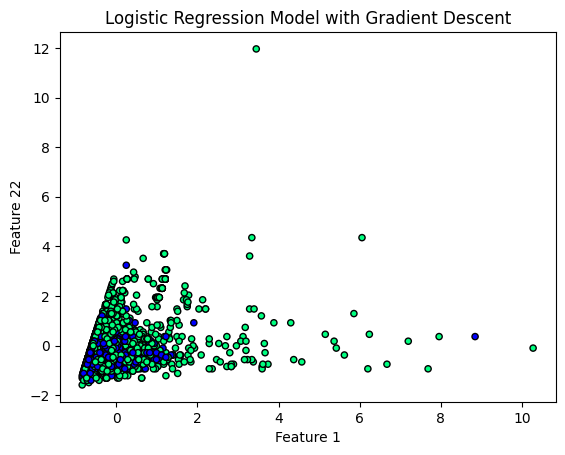

In [54]:
'''
Rerefencias bibliograficas
https://www.geeksforgeeks.org/derivative-of-the-sigmoid-function/
'''
# Define the LogisticRegressionFromScratch class
class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, epochs=5000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        z = np.clip(z, -500, 500)  # Limit the values of z within -500 and 500
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        # Initialize weights and bias
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        
        # Gradient descent
        for epoch in range(self.epochs):
            # Calculate predicted probabilities
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)
            
            # Calculate gradients
            dw = (1 / X.shape[0]) * np.dot(X.T, (y_pred - y))
            db = (1 / X.shape[0]) * np.sum(y_pred - y)
            
            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
    
    def predict(self, X):
        # Calculate predicted probabilities
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        
        # Convert probabilities to binary predictions
        y_pred_binary = np.where(y_pred >= 0.5, 1, 0)
        
        return y_pred_binary

# Create an instance of the LogisticRegressionFromScratch class
model = LogisticRegressionFromScratch()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = np.mean(y_pred == y_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)
f1_score = 2 * (precision * recall) / (precision + recall)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

# Create a scatter plot of the predicted classes
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred, cmap='winter', edgecolor='k', s=20)
plt.title("Logistic Regression Model with Gradient Descent")
plt.xlabel("Feature 1")
plt.ylabel("Feature 22")
plt.show()

accuracy_model_1 = accuracy
precision_model_1 = precision
recall_model_1 = recall
f1_score_model_1 = f1_score



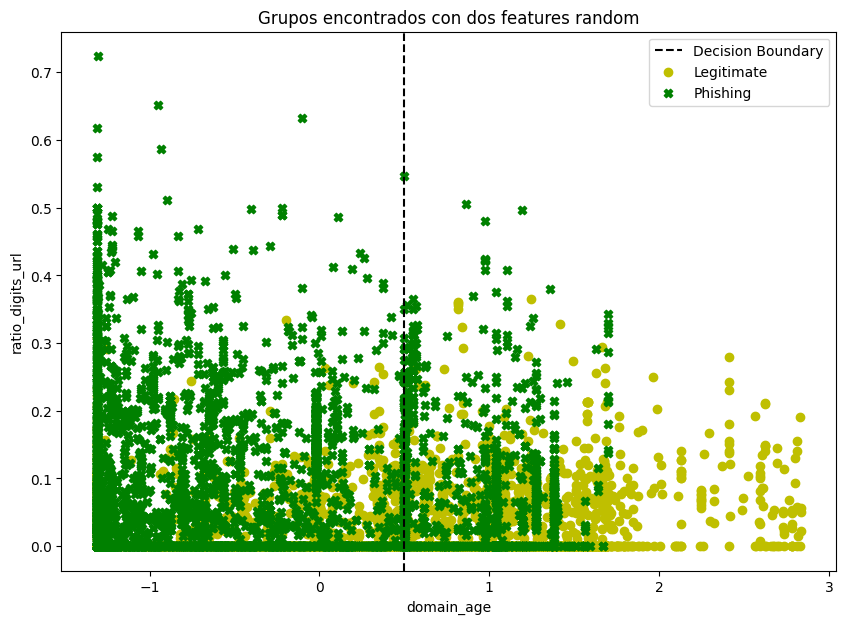

The amount of data analyzed is 9144.


In [55]:
plt.figure(figsize=(10, 7))

# Plot decision boundary
plt.axvline(0.5, color='k', linestyle='--', label='Decision Boundary')

#dos variables aleatorias
# Plot predictions
feature1 = 'domain_age'
feature2 = 'ratio_digits_url'
plt.scatter(X_train[feature1][y_train==0], X_train[feature2][y_train==0], c='y', marker="o", label='Legitimate')
plt.scatter(X_train[feature1][y_train==1], X_train[feature2][y_train==1], c='g', marker="X", label='Phishing')

# Label the axes         
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.legend()

# Add title
plt.title('Grupos encontrados con dos features random')

plt.show()

print("The amount of data analyzed is {}.".format(len(X_train)))



La clase `LogisticRegressionFromScratch` utiliza los siguientes parámetros:

1. `learning_rate`: Es la tasa de aprendizaje que determina qué tan rápido se ajustan los pesos del modelo durante el entrenamiento. Un valor más alto de `learning_rate` puede hacer que el modelo converja más rápidamente, pero también puede hacer que se salte el mínimo global. Un valor más bajo puede hacer que el modelo converja más lentamente, pero con mayor precisión. El valor predeterminado es 0.01.

2. `epochs`: Es el número de veces que el algoritmo de entrenamiento recorre todo el conjunto de datos de entrenamiento. Cada iteración de recorrido se conoce como una época. A medida que aumenta el número de épocas, el modelo tiene más oportunidades de ajustar los pesos y mejorar su rendimiento. Sin embargo, un número demasiado alto de épocas puede llevar al sobreajuste. El valor predeterminado es 1000.

Las métricas utilizadas para validar el modelo son:

1. `accuracy`: Es la proporción de predicciones correctas en comparación con el total de predicciones realizadas. Mide la precisión general del modelo.

2. `precision`: Es la proporción de verdaderos positivos (instancias correctamente clasificadas como positivas) en comparación con el total de instancias clasificadas como positivas por el modelo. Mide la precisión del modelo al predecir la clase positiva.

3. `recall`: Es la proporción de verdaderos positivos en comparación con el total de instancias positivas en los datos reales. Mide la capacidad del modelo para encontrar todas las instancias positivas.

4. `f1_score`: Es una medida que combina la precisión y el recall en un solo valor. Es la media armónica de la precisión y el recall, y proporciona una medida equilibrada del rendimiento del modelo.

El objetivo de utilizar estas métricas es evaluar el rendimiento del modelo de regresión logística y comprender su capacidad para clasificar correctamente las instancias en las clases correspondientes. Estas métricas nos ayudan a medir la precisión, la capacidad de recuperación y el equilibrio entre ambas en el modelo.

La función sigmoide, la gradiente en descenso y los pesos interactúan de la siguiente manera en un modelo de regresión logística:

1. **Función Sigmoide**: La función sigmoide es una función de activación que se utiliza para mapear las predicciones de valor real a una probabilidad entre 0 y 1. En la regresión logística, la combinación lineal de características y pesos se pasa a través de la función sigmoide para obtener una probabilidad.

    ```python
    def sigmoid(z):
        return 1 / (1 + np.exp(-z))
    ```

2. **Gradiente en Descenso**: El gradiente en descenso es un algoritmo de optimización que se utiliza para minimizar la función de coste. En cada iteración, se calcula el gradiente de la función de coste con respecto a los pesos, y luego se actualizan los pesos en la dirección opuesta al gradiente. Esto se hace para minimizar el error de predicción.

    ```python
    def update_weights(X, y, weights, learning_rate):
        predictions = predict(X, weights)
        gradient = np.dot(X.T, predictions - y)
        weights -= learning_rate * gradient
        return weights
    ```

3. **Pesos**: Los pesos son los coeficientes de las características en la función de regresión logística. Estos se inicializan aleatoriamente y luego se actualizan en cada iteración del gradiente en descenso para minimizar la función de coste.

La interacción entre estos tres componentes es fundamental para el funcionamiento de la regresión logística. Los pesos se utilizan para calcular una combinación lineal de las características, que luego se pasa a través de la función sigmoide para obtener una probabilidad. Luego, esta probabilidad se utiliza para calcular el error de predicción, que se minimiza mediante el gradiente en descenso actualizando los pesos. Este proceso se repite hasta que el modelo converge a un mínimo global en la función de coste.

## Aqui comienzo la implementación 2 con librerias:

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create an instance of the LogisticRegression class
model = LogisticRegression(max_iter=5000)  # Increase the max_iter value

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)

Accuracy: 0.9549431321084865
Precision: 0.9596774193548387
Recall: 0.9486271036315324
F1 Score: 0.9541202672605791


Comparamos las metricas de validacion para ambos modelos

In [57]:
# Comparamos las metricas de validacion de ambos modelos:
print("Accuracy modelo 1:", accuracy_model_1, "VS accuracy modelo 2:", accuracy)
print("Precision modelo 1:", precision_model_1, "VS precision modelo 2:", precision)
print("Recall modelo 1:", recall_model_1, "VS recall modelo 2:", recall)
print("F1 Score modelo 1:", f1_score_model_1, "VS F1 Score modelo 2:", f1_score)

Accuracy modelo 1: 0.81583552055993 VS accuracy modelo 2: 0.9549431321084865
Precision modelo 1: 0.7363150867823764 VS precision modelo 2: 0.9596774193548387
Recall modelo 1: 0.9769707705934455 VS recall modelo 2: 0.9486271036315324
F1 Score modelo 1: 0.8397411496003045 VS F1 Score modelo 2: 0.9541202672605791


Basándonos en las métricas, el modelo 2 (implementado con librerías) tuvo un mejor rendimiento que el modelo 1 (implementado desde cero).

El modelo 2 tiene una mayor precisión (0.96 vs 0.74), lo que indica que tiene una mayor proporción de verdaderos positivos sobre el total de positivos predichos. Además, el modelo 2 tiene una mayor puntuación F1 (0.95 vs 0.84), que es una medida ponderada de precisión y recall.

Aunque el modelo 1 tiene un recall ligeramente mayor (0.98 vs 0.95), la mejora en precisión y puntuación F1 del modelo 2 sugiere que, en general, este modelo es más efectivo para clasificar correctamente las instancias.

Estos resultados pueden deberse a: la optimización de la biblioteca, la regularización incorporada, la eficacia del algoritmo de optimización, la inicialización de los pesos etc.

En general, las implementaciones de bibliotecas como scikit-learn suelen ser más eficientes y fáciles de usar que las implementaciones desde cero, pero las implementaciones desde cero pueden ser más instructivas y flexibles. (Ese era el caso en esta ocasion)